In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

### Assuming Maxwellian distribution and nothing fancy

Additional assumptions:
 - plasma is not drifting
 - plasma density is sufficiently high so that sheaths are small compared to the probe dimensions
 - significant fluctuations are not present
 - secondary electron emission is not too large
 - electron neutral collision lengths are large compared to probe dimensions

Area of probe (the area of our isat probes): S $=2*10^{-6}$ m$^2$

Electron mass: m$_e = 9.109*10^{-31}$ kg

Elementary charge: e = $1.602*10^{-19}$ C

In [142]:
S = 2e-6
me = 9.109e-31
e = 1.602e-19

Density (typical): n$_{e,\infty } = 1*10^{18}$ m$^{-3}$

Plasma potential: Vp (Volts)

Temperature (Te) is givin in eV, converted later

In [151]:
n = np.linspace(1e17, 1e19, 20)
Vp = np.linspace(5, 15, 10)
Te = np.linspace(1, 5, 15)
Te = Te * e  # convert to Joules
vsweep = np.linspace(-30, 30, 500)

Make a grid of all possible combinations of our parameter arrays

In [152]:
n_grid, Vp_grid, Te_grid, vsweep_grid = np.meshgrid(n, Vp, Te, vsweep, indexing='ij')

Electron saturation current: I_esat (Amps / $\sqrt{eV}$)

In [199]:
I_esat = S * n_grid * e / np.sqrt(2 * np.pi * me)

In [198]:
current = I_esat * np.sqrt(Te_grid) * np.exp(-e * (Vp_grid - vsweep_grid) / Te_grid)  # calculate the current
condition = Vp_grid < vsweep_grid
current[condition] = I_esat[condition] * np.sqrt(Te_grid)[condition]

In [201]:
current.shape

(20, 10, 15, 500)

<IPython.core.display.Javascript object>


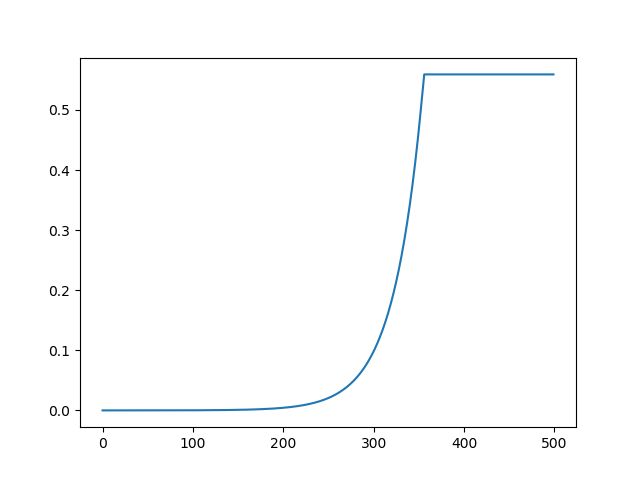

In [197]:
plt.figure()
plt.plot(current[10,7,10,:])